# Generate training and prediction data from insitu and gridded datasets

More datasets are here! https://dap.tern.org.au/thredds/catalog/ecosystem_process/ozflux/catalog.html



## Load modules

In [1]:
import sys
sys.path.append('/g/data/os22/chad_tmp/NEE_modelling/')
from collect_training_data import extract_ec_gridded_data

## Collect training data from EC towers, and gridded data at pixel location of EC tower

This data is used for training the models.


In [2]:
suffixes = [
    'Emerald/2022_v1/L6/default/Emerald_L6_20110610_20131231_Monthly.nc',
    'GreatWesternWoodlands/2022_v1/L6/default/GreatWesternWoodlands_L6_20130101_20220101_Monthly.nc',
    'CowBay/2022_v1/L6/default/CowBay_L6_20090101_20211231_Monthly.nc',
    'Tumbarumba/2021_v1/L6/default/Tumbarumba_L6_20020107_20191231_Monthly.nc',
    'Whroo/2021_v1/L6/default/Whroo_L6_20111201_20210724_Monthly.nc',
    'WombatStateForest/2022_v1/L6/default/WombatStateForest_L6_20100120_20210529_Monthly.nc',
    'WallabyCreek/2022_v1/L6/default/WallabyCreek_L6_20050825_20130409_Monthly.nc',
    'RobsonCreek/2022_v1/L6/default/RobsonCreek_L6_20130801_20211218_Monthly.nc',
    'CapeTribulation/2022_v1/L6/default/CapeTribulation_L6_20100101_20181102_Monthly.nc',
    'AliceSpringsMulga/2022_v1/L6/default/AliceSpringsMulga_L6_20100903_20211231_Monthly.nc',
    'CalperumChowilla/2022_v1/L6/default/Calperum_L6_20100730_20220216_Monthly.nc',
    'DryRiver/2022_v1/L6/default/DryRiver_L6_20091025_20220218_Monthly.nc',
    'Litchfield/2021_v1/L6/default/Litchfield_L6_20150623_20210725_Monthly.nc',
    'SturtPlains/2021_v1/L6/default/SturtPlains_L6_20080828_20210724_Monthly.nc',
    'RiggsCreek/2022_v1/L6/default/RiggsCreek_L6_20110101_20170712_Monthly.nc', #dryland cropping
    'Otway/2021_v1/L6/default/Otway_L6_20070811_20110101_Monthly.nc', # pasture site
    'Yanco/2022_v1/L6/default/Yanco_L6_20130101_20220218_Monthly.nc', # soil site
    
    ## check the location of these ones below as they are new additions
    'Gingin/2022_v1/L6/default/Gingin_L6_20111013_20201231_Monthly.nc', # native Banksia woodland
    'LongreachMitchellGrassRangeland/2022_v1/L6/default/Longreach_L6_20181009_20210909_Monthly.nc',
    'Ridgefield/2022_v1/L6/default/Ridgefield_L6_20160101_20220218_Monthly.nc', #  dryland agriculture
    'SilverPlains/2022_v1/L6/default/SilverPlains_L6_20200101_20211231_Monthly.nc', #Australian Mountain Reseach 
    'DalyUncleared/2022_v1/L6/default/DalyUncleared_L6_20080101_20220217_Monthly.nc', #Woodland savanna
    'Collie/2022_v1/L6/default/Collie_L6_20170804_20191111_Monthly.nc', # wandoo woodland
    'AdelaideRiver/2022_v1/L6/default/AdelaideRiver_L6_20071017_20090524_Monthly.nc', #  Savanna dominated by Eucalyptus
    'Warra/2022_v1/L6/default/Warra_L6_20130305_20210923_Monthly.nc', #tasmania
    
    ### ----------Problematic sites--------
    #'DalyPasture/2022_v1/L6/default/DalyPasture_L6_20080101_20130908_Monthly.nc', #incorrect geographic coordinates
    'CumberlandPlain/2022_v1/L6/default/CumberlandPlain_L6_20140101_20220101_Monthly.nc',# small remnant bushland block in ag district
    'SamfordEcologicalResearchFacility/2022_v1/L6/default/Samford_L6_20100602_20171231_Monthly.nc', #fragmented landscape 5km resolution not good enough
    'Boyagin/2022_v1/L6/default/Boyagin_L6_20171020_20211231_Monthly.nc', #Same grid cell as Rigdeland, in remnant forest BORDERLINE MIGHT BE OKAY
    #'TiTreeEast/2022_v1/L6/default/TiTreeEast_L6_20120718_20220117_Monthly.nc', # on same grid cell as Alice Springs
    #'RedDirtMelonFarm/2021_v1/L6/default/RedDirtMelonFarm_L6_20110923_20130721_Monthly.nc', #small farm in the middle of svannah woodland
    
    'FoggDam/2021_v1/L6/default/FoggDam_L6_20060207_20081031_Monthly.nc' # wetland that floods seasonally
    # 'Loxton/2022_v1/L6/default/Loxton_L6_20080819_20090609_Monthly.nc' # almond tress, 1 year of data
    
]

i=0
sites = []
for suffix in suffixes:
    print(" {:02}/{:02}\r".format(i + 1, len(suffixes)), end="")
    xx = extract_ec_gridded_data(suffix,
                                 scale='1km',
                                 save_ec_data=False,
                                 verbose=False,
                                 add_comparisons=False
                                )
    sites.append(xx)
    i+=1
    

## Examine sites

In [ ]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew
import xarray as xr

from sklearn.preprocessing import PowerTransformer

In [ ]:
base = '/g/data/os22/chad_tmp/NEE_modelling/results/training_data/'
sites = os.listdir('/g/data/os22/chad_tmp/NEE_modelling/results/training_data/')

td = []
for site in sites:
    if '.csv' in site:
        xx = pd.read_csv(base+site, index_col='time', parse_dates=True)
        xx['site'] = site[0:5]
        td.append(xx)

ts = pd.concat(td)#.dropna()
# sites = ts[['site', 'x_coord','y_coord']]
# sites = sites.drop_duplicates().reset_index(drop=True)
# gdf = gpd.GeoDataFrame(
#     sites, geometry=gpd.points_from_xy(sites.x_coord, sites.y_coord), crs='epsg:4326')

# gdf = gdf.drop(['x_coord', 'y_coord'],axis=1)

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(7,5))
sns.distplot(ts.GPP_SOLO_EC, ax=ax, label='GPP')
sns.distplot(ts.ER_SOLO_EC, ax=ax, label='ER')
sns.distplot(ts.NEE_SOLO_EC, ax=ax, label='NEE')
s_nee = skew(ts.NEE_SOLO_EC)
s_gpp = skew(ts.GPP_SOLO_EC)
s_er = skew(ts.ER_SOLO_EC)
ax.legend()
ax.text(.825, .75, 'Skew:',transform=ax.transAxes)
ax.text(.825, .7, 'GPP = {:.3f}'.format(s_gpp),
                transform=ax.transAxes)
ax.text(.825, .65, 'ER = {:.3f}'.format(s_er),
                transform=ax.transAxes)
ax.text(.825, .6, 'NEE = {:.3f}'.format(s_nee),
                transform=ax.transAxes)
ax.set_xlabel('Ozflux Carbon fluxes (gC m\N{SUPERSCRIPT TWO} m⁻¹)')
ax.set_xlim(-225,450)
plt.tight_layout()
#plt.savefig('/g/data/os22/chad_tmp/NEE_modelling/results/figs/ozflux_carbon_flux_distributions.png');

### Power transform distributions to enforce normality

In [ ]:
nee = ts.NEE_SOLO_EC.values.reshape(-1, 1)
gpp = ts.GPP_SOLO_EC.values.reshape(-1, 1)
er = ts.ER_SOLO_EC.values.reshape(-1, 1)

In [ ]:
bc.inverse_transform

In [ ]:
bc = PowerTransformer(method="yeo-johnson")

nee_transformed = bc.fit(nee).transform(nee)
gpp_transformed = bc.fit(gpp).transform(gpp)
er_transformed = bc.fit(er).transform(er)

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(7,5))
sns.distplot(gpp_transformed, ax=ax, label='GPP')
sns.distplot(er_transformed, ax=ax, label='ER')
sns.distplot(nee_transformed, ax=ax, label='NEE')
s_nee = skew(nee_transformed)
s_gpp = skew(gpp_transformed)
s_er = skew(er_transformed)

ax.legend()

ax.text(.825, .75, 'Skew:',transform=ax.transAxes)
ax.text(.825, .7, 'GPP = {:.3f}'.format(s_gpp[0]),
                transform=ax.transAxes)
ax.text(.825, .65, 'ER = {:.3f}'.format(s_er[0]),
                transform=ax.transAxes)
ax.text(.825, .6, 'NEE = {:.3f}'.format(s_nee[0]),
                transform=ax.transAxes)
ax.set_xlabel('Ozflux Carbon fluxes (gC m\N{SUPERSCRIPT TWO} m⁻¹)')
# ax.set_xlim(-225,450)
plt.tight_layout()


In [ ]:
gdf.explore(column='site', marker_kwds={'radius':1000, 'fill':True}, marker_type ='circle',
            tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}', attr='Esri'
           )

## Annual means for each site

Create a plot where x-axis is each site, and the y-axis is the annual mean NEE (GPP,ER).

In [1]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr

In [42]:
base = '/g/data/os22/chad_tmp/NEE_modelling/results/training_data/'
sites = os.listdir('/g/data/os22/chad_tmp/NEE_modelling/results/training_data/')

td = []
for site in sites:
    if '.csv' in site:
        xx = pd.read_csv(base+site, index_col='time', parse_dates=True)
        xx['site'] = site[0:5]
        td.append(xx)

ts = pd.concat(td)#.dropna()

In [43]:
df = ts.groupby('site').resample('Y').sum()

In [44]:
df.head(5)

NEE_SOLO_EC  GPP_SOLO_EC   ER_SOLO_EC        ET_EC  \
site  time                                                             
Adela 2007-12-31   -26.264275   383.674758   250.132321   250.132321   
      2008-12-31  -116.996368  1465.086207  1021.282222  1021.282222   
      2009-12-31  -320.833825   946.893782   538.779020   538.779020   
Alice 2010-12-31  -125.089753   288.423940   156.817352   156.817352   
      2011-12-31  -106.992649   662.592190   379.825059   379.825059   

                       Ta_EC    Sws_EC       RH_EC    Precip_EC        Fn_EC  \
site  time                                                                     
Adela 2007-12-31   56.024372  0.541845  150.499318   418.600000   320.615440   
      2008-12-31  323.298578  2.366839  711.835808  1794.000000  1617.420376   
      2009-12-31  137.399261  1.073145  336.203183  1159.400000   757.849558   
Alice 2010-12-31   72.746743  0.193586  126.741646   151.200000   527.809266   
      2011-12-31  260.096102  0.596883  510.967560   411.599999  1538.600000   

                       Fe_EC  ...      vpd_RS  tavg_anom_RS     SOC_RS  \
site  time                    ...                                        
Adela 2007-12-31  232.602833  ...   33.372660      1.978440   3.421114   
      2008-12-31  951.391902  ...  246.093533     11.811796  20.526686   
      2009-12-31  518.495006  ...   83.648168      4.999135   8.552786   
Alice 2010-12-31  144.721069  ...   77.808238      2.661172   1.523820   
      2011-12-31  359.780238  ...  261.507480     11.279550   6.095280   

                    CO2_RS  C4_percent_RS  elevation_RS  month_RS    VegH_RS  \
site  time                                                                     
Adela 2007-12-31   763.461     168.460128     153.79000      23.0   3.747027   
      2008-12-31  4593.821    1010.760768     922.74000      78.0  22.482162   
      2009-12-31  1918.671     421.150320     384.47500      15.0   9.367567   
Alice 2010-12-31  1162.133     240.512220    1800.38745      33.0  10.982508   
      2011-12-31  4656.868     962.048880    7201.54980      78.0  43.930032   

                    x_coord   y_coord  
site  time                             
Adela 2007-12-31   262.2356  -26.1538  
      2008-12-31  1573.4136 -156.9228  
      2009-12-31   655.5890  -65.3845  
Alice 2010-12-31   399.7470  -66.8490  
      2011-12-31  1598.9880 -267.3960  

[5 rows x 40 columns]

In [49]:
df = df[['NEE_SOLO_EC', 'GPP_SOLO_EC', 'ER_SOLO_EC']]

In [64]:
df

NEE_SOLO_EC  GPP_SOLO_EC   ER_SOLO_EC
site  time                                             
Adela 2007-12-31   -26.264275   383.674758   250.132321
      2008-12-31  -116.996368  1465.086207  1021.282222
      2009-12-31  -320.833825   946.893782   538.779020
Alice 2010-12-31  -125.089753   288.423940   156.817352
      2011-12-31  -106.992649   662.592190   379.825059
...                       ...          ...          ...
Yanco 2018-12-31   163.855066   140.022778   279.935612
      2019-12-31    29.978065   188.589952   234.999423
      2020-12-31  -307.971390   781.515378   492.807655
      2021-12-31  -284.270488   822.386243   637.079443
      2022-12-31    -0.195512    86.481351   160.850537

[250 rows x 3 columns]

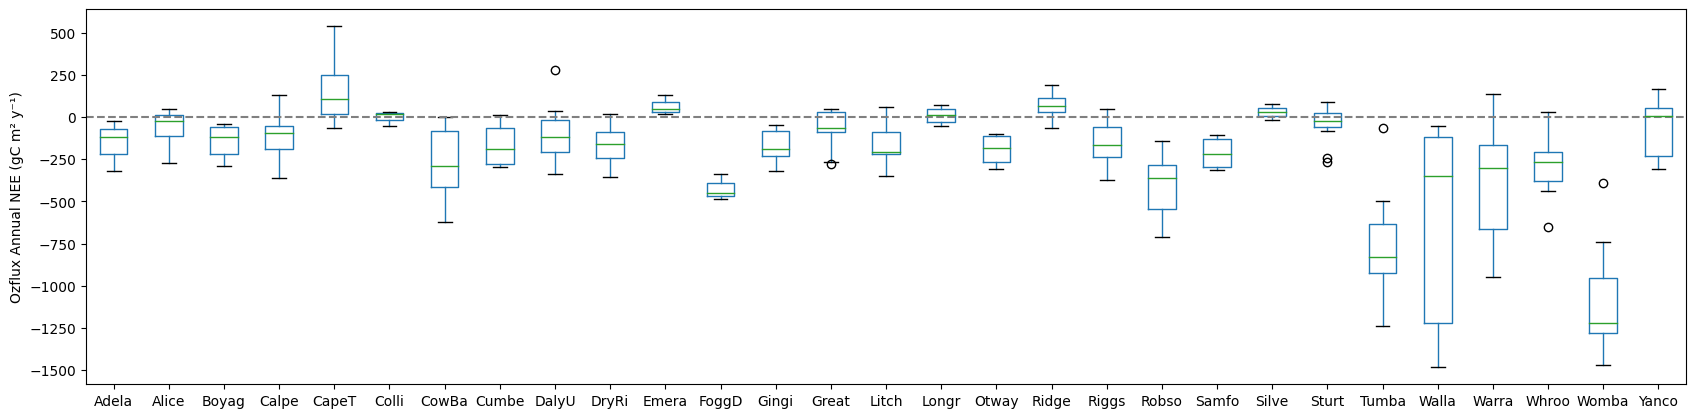

In [69]:
df.boxplot(column='NEE_SOLO_EC', by='site', figsize=(20,5), grid=False)
plt.ylabel('Ozflux Annual NEE (gC m\N{SUPERSCRIPT TWO} y⁻¹)')
plt.title('')
plt.xlabel('')
plt.suptitle('')
plt.axhline(0, c='grey', linestyle='--');

## Collate gridded data for predictions

This data is used to predict on, results of this are stored here `/g/data/os22/chad_tmp/NEE_modelling/results/predicton_data/prediction_data_YYYY.nc`

In [ ]:
import sys
sys.path.append('/g/data/os22/chad_tmp/NEE_modelling/')
from collect_prediction_data import collect_prediction_data

In [ ]:
t1, t2='2003','2021'

In [ ]:
ds = collect_prediction_data(time_start=t1,
                             time_end=t2,
                             verbose=True,
                             export=False
                             )
ds